# Neural Networks Aren't So Scary
> Neural Networks (NNs) are an extremely popular type of machine learning algorithm known for, theoretically, being able to approximate any continuous function. They initially seem daunting, but once you understand the fundamental building blocks of NNs, they really aren't so scary. This blog post provides an overview of linear models, explains how NNs make computations, and demonstrates that you can understand NNs fairly well with only the math background of linear models.

- toc: true 
- badges: true
- comments: true
- categories: [fundamentals, beginner]
- image: images/nnflow.png
- show_description: false
- annotations: true
- show_tags: false

In [1]:
#hide
#necessary packages for the notebook
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#custom matplotlib stylesheet for the blog
plt.style.use('blog')

Neural Networks (NNs) are an extremely popular type of machine learning algorithm known for, theoretically, being able to approximate any continuous function {% cite univ_approx_orig %}. They initially seem daunting, but once you understand the fundamental building blocks of NNs, they really aren't so scary. This blog post provides an overview of linear models, explains how NNs make computations, and demonstrates that you can understand NNs fairly well with only the math background of linear models.

Linear models are one of the simplest approaches to supervised learning. The general goal of supervised learning is to discover some function $f$ that minimizes an error-term $\epsilon$ given a set of input features $X$ and a corresponding target $y$ such that $y = f(X) + \epsilon$. Additionally, the output of a supervised model is often written as $\hat{y} = f(X)$ because $f(X)$ is our best approximation of $y$.

Different algorithms are sufficient for learning different functions. Simple linear models can only learn to make predictions according to functions of the form:

$$y = X^T\beta + \epsilon = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \epsilon$$

Where $\beta_i$ represents learned coefficients with respect to $X_i$, and $T$ is the transpose operation, which in this case is basically identical to computing the dot product of two n-dimensional vectors. 

# Linear Regression

Linear regression is arguably the simplest linear model, and comes with four assumptions:

1. **Linearity**: The relationship between $X$ and the mean of $y$ is linear.
2. **Independence**: $X_i$ and $X_j$ are linearly independent of eachother for all $i \neq j$.
3. **Normality**: $y$ given any $X$ comes from a normal distribution.
4. **Homoscedasticity**: The variance of the error is the same for any value of $X$.

These assumptions can be nicely described by one math equation:

$$
\begin{aligned}
y & \in \mathcal{N}(X^T\beta, \sigma^2 I) \\
& \Rightarrow \mathbb{E}[y|X] = \mu(X) = X^T\beta
\end{aligned}
$$

Unfortunately, these assumptions are quite rigid for the real world. Many datasets do not conform to these restrictions. So why do we still use linear regression when we have algorithms that can perform the regression task without such rigid assumptions? The common answers to this question are:

1. **Occam's Razor**: Don't add complexity without necessity.    
2. **Little Data**: Ordinary Least Squares (OLS) is a closed form solution to linear regression{% fn 1 %}.
3. **Interpretability**: $y$ can be explained with respect to how $X$ interacts with the $\beta$ coefficients.

# Generalized Linear Models (GLMs)

Generalized Linear Model (GLM), introduced in {% cite GLM %}, loosen the constraints of normality, linearity, and homoscedasticity described in the previous section. Furthermore, GLMs break down the problem into three different components:

1. **Random Component**: The probability distribution of $y$ (typically belonging to the exponential family{% fn 2 %}).
2. **Systematic Component**: the right side of the equation for predicting $y$ (typically $X^T\beta$).
3. **Link Function**: A function $g$ that links the systematic component and the random component.

This yields the following general equation for GLMs:

$$g(\mathbb{E}[y|X]) = X^T\beta + \epsilon$$

Observe that if the random component is a normal distribution with a constant variance, and the link function is the identity function ($g(y) = y$), then the corresponding GLM is exactly linear regression! Hence, the functions that GLMs can describe are a superset of the functions linear regression can describe.

Selecting a link function according to the random component is what differentiates GLMs. The intuition behind a link function is that it transforms the distribution of $y$ to the range $(-\infty,+\infty)$, as that is the expected range of $X^T\beta$. As an example, binary logistic regression assumes the probability distribution of $y$ is a bernoulli distribution. This means that the average of the distribution, $\mu$, is between 0 and 1. We need some function $g: [0,1] \rightarrow \Reals$, and the logit function is sufficient for this:

$$g(\mu) = log(\frac{\mu}{1 - \mu})$$

Now, we can fit a simple linear model to $g(y) = X^T\beta + \epsilon$. Unfortunately, introducing a non-linear transformation to this equation means that Ordinary Least Squares is no longer a reasonable estimation method. Hence, learning $\beta$ requires a different estimation method. Maximum Likelihood Estimation (MLE) estimates the parameters of a probability distribution by maximizing the likelihood that a sample of observed data belongs to that probability distribution. In fact, under the assumptions of simple linear regression, MLE is equivalent to OLS as demonstrated on page 2 of [these CMU lecture notes](https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/06/lecture-06.pdf). The specifics of MLE are not necessary for the rest of this blog post, however if you would like to learn more about it, please refer to [these Stanford lecture notes](http://web.stanford.edu/class/archive/cs/cs109/cs109.1202/lectureNotes/LN21_parameters_mle.pdf).

# The Building Blocks of Neural Networks

But where do neural networks come in? Aren't they incredibly non-linear and opaque, unlike GLMs? Sort of. On the macro-level, NNs and GLMs look very different, but the micro-level tells a different story. Let's zoom into the inner workings of neural networks and see how they relate to GLMs!

Neural networks are built of components called layers. Layers are built of components called nodes. At their heart, these nodes are computational-message-passing-machines. They receive a set of inputs, perform a computation, and pass the result of that computation to other nodes in the network. These are the building blocks of neural networks.

The first layer of a neural network is called the input layer, because each node passes an input feature to all nodes in the next layer. The last layer of a neural network is called the output layer, and it should represent the output you are trying to predict (this layer has one node in the classic regression case). Lastly, any layers between the input and output layers are called hidden layers.

![](https://ryansaxe.com/images/nnonelayer.png)

In the classic fully-connected feed-forwad neural network, this structure of layers is ordered and connected such that every node $n_j$ in layer $L_i$ receives the output of every node in the predecing layer $L_{i-1}$, does some computation with those outputs, and passes the corresponding output to each node in the succeeding layer $L_{i + 1}$. The image above displays a neural network with $N$ input features, a single hidden layer, and a single output prediction $\hat{y}$.

Each node in layer $L_i$ contains some set of weights ($w$) and a bias ($b$), where the dimension of the weight vector is equal to the number of nodes in layer $L_{i - 1}$. When the node receives the output of all the nodes in the preceding layer, it performs the following computation: $L_{i - 1}^Tw + b$. 

This should look familiar! It is quite literally $X^T\beta$: the classic computation from linear models on the ouputs of the preceding layer!

However, before this node passes $X^T\beta$ to the next layer in the network, it is passed through an activation function $f$. Activation functions often introduce non-linearity to the neural network, similar to link functions in GLMs. The image below isolates a single neuron from the image above, taking input from the previous layer, and making a prediction by transforming the output of the neuron with an activation function $\hat{y} = f(X^T\beta)$.

![](https://ryansaxe.com/images/nnflow.png) 

In fact, observe that if the activation function is invertible, this computation is equivalent to $f^{-1}(\hat{y}) = X^T\beta$, which is exactly a GLM with link function $f^{-1}$. This demonstrates that <u>the computation of a single node in a neural network is, conceptually, a GLM on the output of the previous layer!</u>

Furthermore, this means that a neural network with zero hidden layers and a linear activation function on the output layer is exactly equivalent to linear regression, as the lack of hidden layers maintains independence. And, if we change the activation function to the inverse of the logit function (this is the sigmoid activation function), this neural network becomes exactly equivalent to logistic regression! The code below is a simple prototype of building linear and logistic regression with [Keras](https://www.keras.io), and tests it on a simulated dataset.

In [2]:
#hide
#set up parameters to generate 3 normally distributed columns
columns = list('abc')
beta = [1, 1, 1]
bias = 0.0
size = 100000
mean = 5.0
std = 1.0
#create the dataset
data = {
    col: np.random.normal(
        size=size, loc=mean, scale=std
    ) for col in columns
}
X = pd.DataFrame(data)
betaX = X.copy()
for i,col in enumerate(columns):
    betaX[col] = X[col] * beta[i]
y_logistic = ((bias + betaX.sum(1)) > betaX.sum(1).mean()).astype(float)
y_linear = bias + betaX.sum(1)
#X.assign(target=y).head()

In [3]:
class LinearRegression(tf.keras.Model):
    def __init__(self):
        super().__init__()
        # zero hidden layers with a linear activation on one output node
        self.output_layer = tf.keras.layers.Dense(1, activation='linear')
    
    def call(self, input_layer, training=None):
        return self.output_layer(input_layer)
    
class LogisticRegression(tf.keras.Model):
    def __init__(self):
        super().__init__()
        # zero hidden layers with a sigmoid activation on one output node
        self.output_layer = tf.keras.layers.Dense(1, activation='sigmoid')
    
    def call(self, input_layer, training=None):
        return self.output_layer(input_layer)

In [4]:
#hide
#logistic regression setup
logistic_reg = LogisticRegression()
logistic_reg.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['mean_absolute_error']
)
hist = logistic_reg.fit(
    X.to_numpy(),
    y_logistic.to_numpy(),
    epochs=20,
    batch_size=32,
)

Train on 100000 samples
Epoch 1/20
100000/100000 [==============================] - 5s 48us/sample - loss: 1.0019 - mean_absolute_error: 0.5032
Epoch 2/20
100000/100000 [==============================] - 3s 33us/sample - loss: 0.6680 - mean_absolute_error: 0.4803
Epoch 3/20
100000/100000 [==============================] - 3s 33us/sample - loss: 0.6056 - mean_absolute_error: 0.4515
Epoch 4/20
100000/100000 [==============================] - 3s 33us/sample - loss: 0.5589 - mean_absolute_error: 0.4245
Epoch 5/20
100000/100000 [==============================] - 3s 34us/sample - loss: 0.5185 - mean_absolute_error: 0.3995
Epoch 6/20
100000/100000 [==============================] - 3s 34us/sample - loss: 0.4837 - mean_absolute_error: 0.3771
Epoch 7/20
100000/100000 [==============================] - 3s 34us/sample - loss: 0.4537 - mean_absolute_error: 0.3570
Epoch 8/20
100000/100000 [==============================] - 3s 34us/sample - loss: 0.4276 - mean_absolute_error: 0.3390
Epoch 9/20
10000

In [5]:
#hide
print('binary crossentropy loss:',round(hist.history['loss'][-1],3),'\nmean absolute error:',round(hist.history['mean_absolute_error'][-1],3))

binary crossentropy loss: 0.267 
mean absolute error: 0.219


In [6]:
#hide
#linear regression setup
linear_reg = LinearRegression()
linear_reg.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)
hist = linear_reg.fit(
    X.to_numpy(),
    y_linear.to_numpy(),
    epochs=20,
    batch_size=32,
)

Train on 100000 samples
Epoch 1/20
100000/100000 [==============================] - 3s 33us/sample - loss: 90.5242 - mean_absolute_error: 6.9438
Epoch 2/20
100000/100000 [==============================] - 3s 30us/sample - loss: 1.7286 - mean_absolute_error: 1.0439
Epoch 3/20
100000/100000 [==============================] - 3s 30us/sample - loss: 0.5233 - mean_absolute_error: 0.5466
Epoch 4/20
100000/100000 [==============================] - 3s 31us/sample - loss: 0.0262 - mean_absolute_error: 0.1219
Epoch 5/20
100000/100000 [==============================] - 3s 31us/sample - loss: 0.0040 - mean_absolute_error: 0.0472
Epoch 6/20
100000/100000 [==============================] - 3s 30us/sample - loss: 8.4455e-05 - mean_absolute_error: 0.0050
Epoch 7/20
100000/100000 [==============================] - 3s 30us/sample - loss: 1.5579e-10 - mean_absolute_error: 4.3810e-06
Epoch 8/20
100000/100000 [==============================] - 3s 30us/sample - loss: 1.4272e-07 - mean_absolute_error: 1.5318

In [7]:
#hide
print('mean squared error:',round(hist.history['loss'][-1],3),'\nmean absolute error:',round(hist.history['mean_absolute_error'][-1],3))

mean squared error: 0.0 
mean absolute error: 0.0


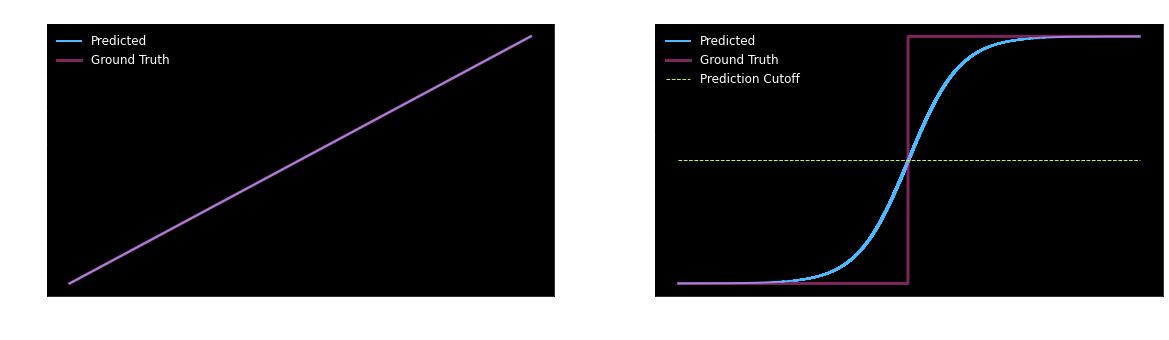

In [8]:
#hide_input
fig, axes = plt.subplots(1, 2)

X['target'] = betaX.sum(1)
x_sorted = X.sort_values(by='target')
y_before_label = bias + x_sorted['target']
test_y = (y_before_label > x_sorted['target'].mean()).astype(float).to_numpy()
test_X = x_sorted[columns].to_numpy(dtype=np.float32)

axes[0].plot(y_before_label, linear_reg(test_X), label="Predicted", lw=2)
axes[0].plot(y_before_label,y_before_label,label="Ground Truth", alpha=0.5)
axes[0].legend()
axes[0].set_title('Basic Linear Regression')
axes[0].set_xlabel('Sum of input features', c='white')
axes[0].set_ylabel('Target feature', c='white')

axes[1].plot(y_before_label, logistic_reg(test_X), label="Predicted", lw=2)
axes[1].plot(y_before_label,test_y,label="Ground Truth", alpha=0.5)
axes[1].plot([y_before_label.min(),y_before_label.max()], [0.5, 0.5], ls="--", lw=1, label="Prediction Cutoff")
axes[1].legend()
axes[1].set_title('Basic Logistic Regression')
axes[1].set_xlabel('Sum of input features', c='white')
axes[1].set_ylabel('Target feature', c='white')
plt.show()

# Understanding Hidden Layers

<div class="fake-header h2">References</div>
{% bibliography --cited %}

<div class="fake-header h2">Footnotes</div>
<ol class='footnotes'>

{{ "the nuances of fitting these models (e.g. Maximum Likelihood Estimation, Backfitting, Gradient Descent) are not covered in detail in this blog post. There are links to papers and lectures on these topics in their corresponding sections if you would like to read about them." | fndetail: 1}}

{{ "The closed form solution for OLS is $\beta = (X^TX)^\inv X^Ty$. This requires $X^TX$ to be invertible, which is the case when the elements in $X$ are linearly independent. This is satisfied by our assumption of independence. Without this assumption, there is no closed form solution, and $\beta$ can be approximated by the maximum likelihood estimation function: $min_\beta(y - \beta X)^T(y - \beta X)$." | fndetail: 2 }}

{{ 'The exponential family is a particular family of probability distributions such that their probability density function (PDF) can be writted as: $P(x | \theta) = f(x) g(\theta) exp \Big( \eta(\theta) \centerdot T(x) \Big)$, where $f$, $g$, $\eta$, and $T$ are known functions and $\theta \in \Reals$ is the only parameter to the PDF.' | fndetail: 3 }}

{{ 'This explains why we could create a model identical to linear and logistic regression by designing a neural network with zero hidden layers.' | fndetail: 4 }}

{{ 'The "smoothness" of a function is described by the continuity of the derivatives. The set of functions with a smoothness of 0 is equivalent to the set of continuous functions. The set of functions with a smoothness of 1 is the set of continuous functions such that their first derivative is continuous. So on, and so forth. Generally, a function is considered "smooth" if it has "smoothness" of $\infty$. In other words, it is infinitely differentiable.' | fndetail: 5 }}

{{ 'The actual function being fit here is $f(x_1,x_2) = a(x_1) + b(x_2)$, however I plot the function $f(x_1 + x_2) = a(x_1) + b(x_2)$ in order to project it as two-dimensional, as that is easier for readers to look at.' | fndetail: 6 }}

{{ 'Technically, this could be fit where the sub-networks take more than a single feature as input, but this comes at a cost of interpretability. It is still possible to explore the relationship between both features and the output, however it becomes high-dimensional, entangled, and hence more difficult to interpret.' | fndetail: 7 }}
</ol>